In [15]:
# All imports are here
%matplotlib inline
import numpy as np
import scipy.stats as sts
from typing import Dict, Tuple
import matplotlib.pyplot as plt


In [8]:
def pearson_coeff(x: np.array, y: np.array) -> float:
    """
    This function calculates the pearson coefficient for a sample dataset
    :param x: numpy array of x values
    :param y: numpy array of y values
    :return: pearson coefficient
    """
    covar = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    varx = np.sum((x - np.mean(x)) ** 2)
    vary = np.sum((y - np.mean(y)) ** 2)
    return covar / np.sqrt(varx * vary)


In [91]:
def linear_regression_least_squared(x: np.array, y:np.array) -> Dict[str, float]:
  """
  This function calculates the linear regression of the given data
  :param x: 1D numpy array of data
  :param y: 1D numpy array of data
  :return: dictionary of the linear regression parameters
  """
  # least squared estimate of the slope
  slope = np.sum((x - np.mean(x))*y) / np.sum((x - np.mean(x)) ** 2)

  # least squared estimate of intercept
  intercept = np.mean(y) - slope * np.mean(x)

  # predicted data
  predicted = intercept + np.multiply(x, slope)

  degrees_of_freedom = len(y) - 2

  # mean squared error of residuals
  residual = (y - predicted)
  sum_squared_residuals = np.sum(residual ** 2)
  mean_squared_error = np.sum(residual ** 2) / degrees_of_freedom

  # variance of slope
  variance_slope = mean_squared_error / np.sum((x - np.mean(x)) ** 2)

  # null hypothesis: slope = 0
  t_statistic = slope / np.sqrt(variance_slope)

  # p-value
  p_value = 2 * (sts.t.cdf(-1*np.abs(t_statistic), df=degrees_of_freedom))

  return {
    "slope": slope,
    "intercept": intercept,
    "residual": residual,
    "sum_squared_residuals": sum_squared_residuals,
    "mean_squared_error": mean_squared_error,
    "variance_slope": variance_slope,
    "degrees_of_freedom": degrees_of_freedom,
    "t_statistic": t_statistic,
    "p_value": p_value
    }


In [122]:
def lack_of_fit_test(x: np.array, y:np.array) -> Dict[str, float]:
    """
    This function performs the lack of fit test using linear regression
    :param x: 1D numpy array of data
    :param y: 1D numpy array of data
    :return: dictionary of lack of fit test parameters
    """
    # fit the data to a linear regression
    regression = linear_regression_least_squared(x, y)
    sum_squared_residuals = regression["sum_squared_residuals"]

    # group nearest x values and compute pure error in y
    z = list(zip(x, y))
    z.sort(key=lambda x: x[0])
    pure_error = 0
    number_of_groups = 0
    group_length = 2
    for i in range(0, len(z), group_length):
        group = z[i:i+group_length]

        number_of_groups += 1
        mean_y = np.mean(group, axis=0)[1]
        # print(group, mean_y)
        for g in group:
            pure_error += (g[1] - mean_y) ** 2

    # lack of fit test
    n = len(x)
    numerator = (sum_squared_residuals - pure_error) / (number_of_groups - 2)
    denominator = pure_error / (n - number_of_groups)
    f_statistic = numerator / denominator

    # calculate p value using f distribution
    alpha = 0.05
    f_critical = sts.f.ppf(1 - alpha, number_of_groups - 2, n - number_of_groups)
    p_value = 1 - sts.f.cdf(f_statistic, number_of_groups - 2, n - number_of_groups)

    return {
        "f_statistic": f_statistic,
        "f_critical": f_critical,
        "p_value": p_value
    }


### Question 2

#### 2.a

Pearson co-efficient for dataset 1:  0.81642051634484
Pearson co-efficient for dataset 2:  0.8162365060002427
Pearson co-efficient for dataset 3:  0.8162867394895981
Pearson co-efficient for dataset 4:  0.816521436888503
Coefficient of multiple determination for dataset 1:  0.6665424595087752
Coefficient of multiple determination for dataset 2:  0.6662420337274841
Coefficient of multiple determination for dataset 3:  0.666324041066559
Coefficient of multiple determination for dataset 4:  0.6667072568984656


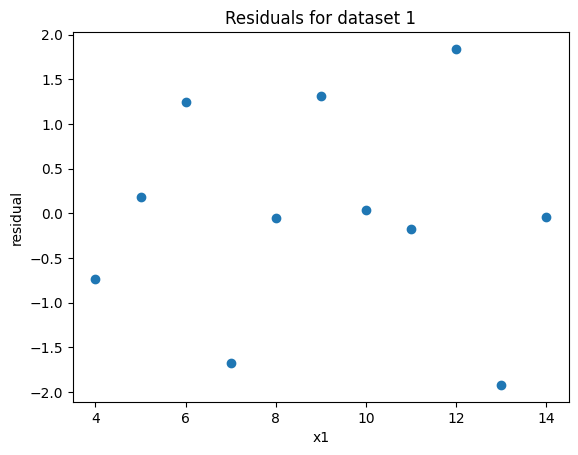

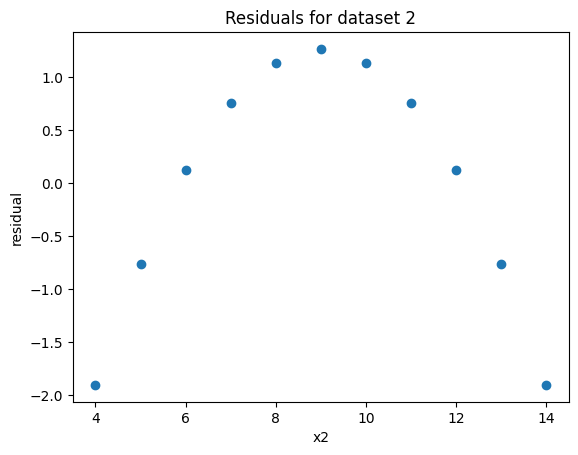

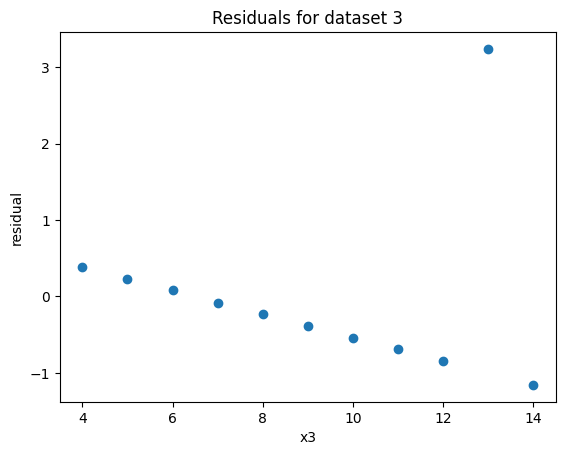

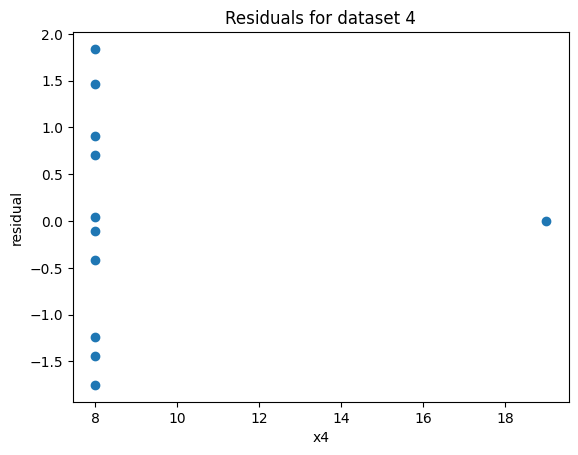

In [110]:
# Anscombe datasets
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], dtype=np.float64)

x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74], dtype=np.float64)

x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], dtype=np.float64)

x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], dtype=np.float64)
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89], dtype=np.float64)

# calculate pearson co-efficient
r1 = pearson_coeff(x1, y1)
r2 = pearson_coeff(x2, y2)
r3 = pearson_coeff(x3, y3)
r4 = pearson_coeff(x4, y4)
print("Pearson co-efficient for dataset 1: ", r1)
print("Pearson co-efficient for dataset 2: ", r2)
print("Pearson co-efficient for dataset 3: ", r3)
print("Pearson co-efficient for dataset 4: ", r4)

# calculate co-efficient of multiple determination
print("Coefficient of multiple determination for dataset 1: ", r1 ** 2)
print("Coefficient of multiple determination for dataset 2: ", r2 ** 2)
print("Coefficient of multiple determination for dataset 3: ", r3 ** 2)
print("Coefficient of multiple determination for dataset 4: ", r4 ** 2)

# calculate residuals
residual1 = linear_regression_least_squared(x1, y1)["residual"]
residual2 = linear_regression_least_squared(x2, y2)["residual"]
residual3 = linear_regression_least_squared(x3, y3)["residual"]
residual4 = linear_regression_least_squared(x4, y4)["residual"]

# plot residuals
plt.scatter(x1, residual1)
plt.xlabel("x1")
plt.ylabel("residual")
plt.title("Residuals for dataset 1")
plt.show()

plt.scatter(x2, residual2)
plt.xlabel("x2")
plt.ylabel("residual")
plt.title("Residuals for dataset 2")
plt.show()

plt.scatter(x3, residual3)
plt.xlabel("x3")
plt.ylabel("residual")
plt.title("Residuals for dataset 3")
plt.show()

plt.scatter(x4, residual4)
plt.xlabel("x4")
plt.ylabel("residual")
plt.title("Residuals for dataset 4")
plt.show()


#### 2.b

In [123]:
# perform lack of fit test
print("Lack of fit test for dataset 1: ", lack_of_fit_test(x1, y1))
print("Lack of fit test for dataset 2: ", lack_of_fit_test(x2, y2))
print("Lack of fit test for dataset 3: ", lack_of_fit_test(x3, y3))
print("Lack of fit test for dataset 3: ", lack_of_fit_test(x4, y4))


Lack of fit test for dataset 1:  {'f_statistic': 0.310813324200126, 'f_critical': 5.192167772803923, 'p_value': 0.8597311779823037}
Lack of fit test for dataset 2:  {'f_statistic': 6.352977388623873, 'f_critical': 5.192167772803923, 'p_value': 0.03385559365971624}
Lack of fit test for dataset 3:  {'f_statistic': 0.346779534458874, 'f_critical': 5.192167772803923, 'p_value': 0.8365858314741742}
Lack of fit test for dataset 3:  {'f_statistic': 5.446206170697954, 'f_critical': 5.192167772803923, 'p_value': 0.045668937642535434}


#### 2.c
Dataset I: No significant lack of fit.

Dataset II: Significant lack of fit.

Dataset III: Ambiguous, depends on the influence of the outlier.

Dataset IV: Test might not be appropriate due to the nature of the data. 
If forced, likely a significant lack of fit.


### Question 3

#### 3.a
The Bonferroni adjustment controls the Familywise Error Rate (FWER). This is the probability of making at least one Type I error when performing multiple statistical tests. By adjusting the significance level with the Bonferroni method, the FWER is kept at the desired level (e.g., 0.05). In simple terms, it's a conservative adjustment to ensure that when we're looking at multiple tests or intervals, our overall chance of incorrectly rejecting a true null hypothesis remains at the specified level (like 5%).


In [145]:
# fit a linear regression model for the first dataset
regression = linear_regression_least_squared(x1, y1)

given_x = np.array([4, 6, 8, 10, 12, 14])
estimated_y = regression["intercept"] + regression["slope"] * given_x

# calculate standard error for the estimated y
standard_error = np.sqrt(
    regression["mean_squared_error"] *
    (1/len(x1) + (given_x - np.mean(x1)) ** 2 / np.sum((x1 - np.mean(x1)) ** 2)))


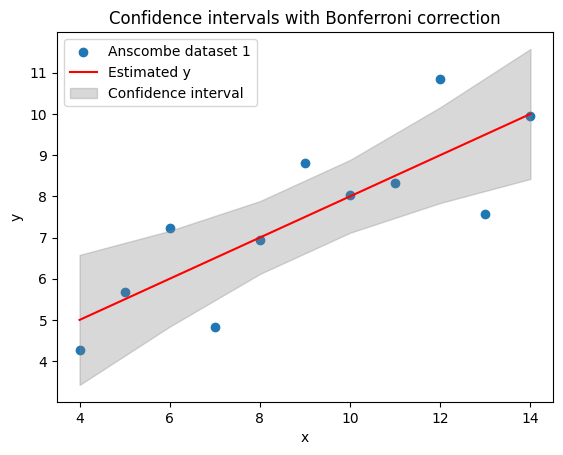

In [146]:
# Bonferroni correction
# calculate confidence interval
alpha = 0.05
number_of_tests = 2
t_critical = sts.t.ppf(1 - alpha / number_of_tests, regression["degrees_of_freedom"])
confidence_interval = t_critical * standard_error

# lower and upper bounds of the confidence interval
lower_bound = estimated_y - confidence_interval
upper_bound = estimated_y + confidence_interval

# plot the data
plt.scatter(x1, y1, label="Anscombe dataset 1")
plt.plot(given_x, estimated_y, color='red', label="Estimated y")
# plt.plot(given_x, lower_bound, color='green', label="CI Lower bound")
# plt.plot(given_x, upper_bound, color='green', label="CI Upper bound")
plt.fill_between(given_x, lower_bound, upper_bound,  color='gray', alpha=0.3, label="Confidence interval")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Confidence intervals with Bonferroni correction")
plt.legend()
plt.show()


#### 3.b
The Working-Hotelling confidence band controls the simultaneous coverage probability. That means, for a 95% Working-Hotelling confidence band, there's a 95% probability that the entire true regression line falls within the band for all values of X within the range of the observed data.

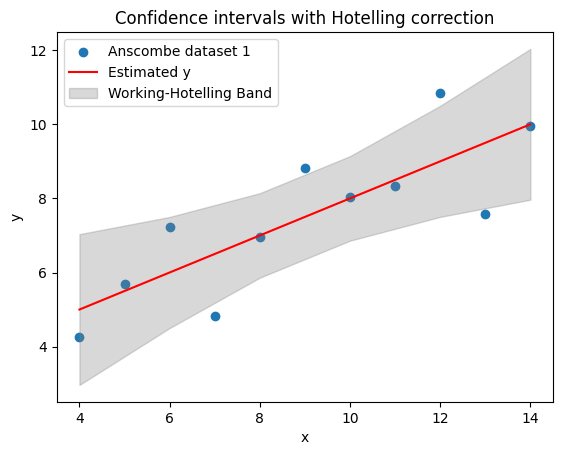

In [147]:
# working hotelling confidence interval
# calculate confidence interval
alpha = 0.05
w_squared = 2 * sts.f.ppf(1 - alpha, 2, regression["degrees_of_freedom"])
w = np.sqrt(w_squared)
confidence_interval = w * standard_error

# lower and upper bounds of confidence interval
lower_bound = estimated_y - confidence_interval
upper_bound = estimated_y + confidence_interval

# plot the data
plt.scatter(x1, y1, label="Anscombe dataset 1")
plt.plot(given_x, estimated_y, color='red', label="Estimated y")
# plt.plot(given_x, lower_bound, color='green', label="CI Lower bound")
# plt.plot(given_x, upper_bound, color='green', label="CI Upper bound")
plt.fill_between(given_x, lower_bound, upper_bound, color='gray', alpha=0.3, label='Working-Hotelling Band')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Confidence intervals with Hotelling correction")
plt.legend()
plt.show()


Is this procedure more efficient?

The efficiency of the procedure depends on the purpose:

If you're interested in making inferences about E[Y1] at specific values of X1, then individual confidence intervals (like those adjusted with Bonferroni) might be narrower and therefore more "efficient" in the sense of precision.

However, if you want to make inferences about the entire regression line, then the Working-Hotelling band is more efficient because it provides simultaneous coverage for the entire line. Individual confidence intervals wouldn't be appropriate for this broader type of inference.

In terms of power, the Bonferroni method is generally more conservative because it adjusts the significance level based on the number of tests. The Working-Hotelling method, on the other hand, controls the error rate for the entire curve, making it less conservative for testing hypotheses about the entire regression function.